# Proyecto 3. Analíticia Computacional - Tarea 1 y Visualización de Datos
- Nicolas Ricaurte
- Juan Camilo Bello

#### Modelo predictivo para medir la probabilidad de obtener una beca del gobierno en el examen de estado de la educación superior (Saber 11) dadas las condiciones sociales

### Analisis exploratorio de datos

En Amazon athena, se implementaron las Queries para obtener subconjuntos de datos y sacar las siguientes estadisticas y visualizaciones:

- Query 1: Promedio de puntaje de acuerdo con la educación de los padres
- Query 2: Promedio de puntaje de acuerdo con el departamento
- Query 3: Promedio del puntaje de acuerdo con el estrato

- Query 4: Cantidad de estudiantes que obtienen un puntaje mayor a 359 de acuerdo con el departamento
- Query 5: Cantidad de estudiantes que obtienen un puntaje mayor a 359 de acuerdo con el estrato

#### Finalmente se analizaron los datos en athena, notando la distribución de estos y se obtuvo la base de datos desde el 2019-1 en adelante para las columnas que queremos visualizar con el Query 6 y el Query 7 que corresponde unicamente a cundinamarca

#### Query 1

```SQL
SELECT fami_educacionpadre, fami_educacionmadre, AVG(punt_global) AS promedio_puntaje, STDDEV(punt_global) AS desviacion_estandar_puntaje
FROM saber11
GROUP BY fami_educacionpadre, fami_educacionmadre

```

#### Query 2

```SQL
SELECT estu_depto_reside, AVG(punt_global) AS promedio_puntaje, STDDEV(punt_global) AS desviacion_estandar_puntaje
FROM saber11
GROUP BY estu_depto_reside

```

#### Query 3
```SQL
SELECT fami_estratovivienda, AVG(punt_global) AS promedio_puntaje, STDDEV(punt_global) AS desviacion_estandar_puntaje
FROM saber11
GROUP BY fami_estratovivienda
```

#### Query 4
```SQL
SELECT estu_depto_reside, COUNT(*) AS cantidad_estudiantes, SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) AS cantidad_superan_puntaje,
        (SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS porcentaje_superan_puntaje
        (SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS porcentaje_superan_puntaje
FROM saber11
GROUP BY estu_depto_reside
```

#### Query 5

```SQL
SELECT fami_estratovivienda, COUNT(*) AS cantidad_estudiantes, SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) AS cantidad_superan_puntaje,
        (SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS porcentaje_superan_puntaje
        (SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS porcentaje_superan_puntaje
FROM saber11
GROUP BY fami_estratovivienda
```

#### Query 6

```SQL
SELECT periodo, fami_educacionpadre, fami_educacionmadre, estu_depto_reside, fami_estratovivienda, punt_global
FROM saber11
WHERE periodo >= 20191
```

#### Query 7

```SQL
SELECT SELECT fami_educacionpadre, fami_educacionmadre, estu_depto_reside, estu_mcpio_reside, fami_estratovivienda, punt_global
FROM saber11
WHERE periodo >= 20191
AND estu_depto_reside = 'CUNDINAMARCA'
```

#### Limpiar datos

In [ ]:
# Desde el archivo CSV, se cargan los datos en un DataFrame de Pandas (Datosviz1.csv)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mapppping1 = {'No sabe': 0,'No Aplica': 0,'Ninguno': 0, 'Primaria incompleta': 1, 'Primaria completa': 2, 'Secundaria (Bachillerato) incompleta': 3, 'Secundaria (Bachillerato) completa': 4, 'TÃ©cnica o tecnolÃ³gica incompleta': 5, 'TÃ©cnica o tecnolÃ³gica completa': 6, 'EducaciÃ³n profesional incompleta':7,'EducaciÃ³n profesional completa':8,'Postgrado':9}
mappping2 = {'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6, 'Sin estrato': 0}

# Educacion de los padres
viz['fami_educacionmadre'] = viz['fami_educacionmadre'].map(mapppping1)
viz['fami_educacionpadre'] = viz['fami_educacionpadre'].map(mapppping1)
viz['fami_educacionpadre'] = viz['fami_educacionpadre'].fillna(0)
viz['fami_educacionmadre'] = viz['fami_educacionmadre'].fillna(0)
viz['fami_educacionpadre'] = viz['fami_educacionpadre'].astype(int)
viz['fami_educacionmadre'] = viz['fami_educacionmadre'].astype(int)
# Remplazar los valores de la educacion de los padres
remplazar1 ={0: 'No Aplica', 1: 'Primaria incompleta', 2: 'Primaria completa', 3: 'Secundaria (Bachillerato) incompleta', 4: 'Secundaria (Bachillerato) completa', 5: 'Tecnica o tecnologica incompleta', 6: 'Tecnica o tecnologica completa', 7: 'Educacion profesional incompleta', 8: 'Educacion profesional completa', 9: 'Postgrado'}
viz['fami_educacionpadre'] = viz['fami_educacionpadre'].map(remplazar1)
viz['fami_educacionmadre'] = viz['fami_educacionmadre'].map(remplazar1)
# Si dropnan
viz = viz.dropna()

# Estrato
viz['fami_estratovivienda'] = viz['fami_estratovivienda'].map(mappping2)
viz['fami_estratovivienda'] = viz['fami_estratovivienda'].fillna(0)

# Remplazar los valores de la educacion de los padres
remplazar2 ={0: 'Sin estrato', 1: 'Estrato 1', 2: 'Estrato 2', 3: 'Estrato 3', 4: 'Estrato 4', 5: 'Estrato 5', 6: 'Estrato 6'}
viz['fami_estratovivienda'] = viz['fami_estratovivienda'].map(remplazar2)

# Departamento
# Juntar todos los valores de la columna departamentos que digan valle o cauca en VALLE DEL CAUCA
viz['estu_depto_reside'] = viz['estu_depto_reside'].replace('CAUCA', 'VALLE DEL CAUCA')
viz['estu_depto_reside'] = viz['estu_depto_reside'].replace('VALLE', 'VALLE DEL CAUCA')
# Eliminar sin en departamento dice EXTRANJERO
viz = viz[viz.estu_depto_reside != 'EXTRANJERO']
viz = viz[viz.estu_depto_reside != '13212']
viz = viz[viz.estu_depto_reside != '11001']

In [14]:
import pandas as pd
import numpy as np

# Cargar los datos
viz = pd.read_csv('visualizacionLimpio.csv')

In [15]:
# Imprimir los valores unicos de la columna fami_educacionpadre
print(viz['fami_educacionpadre'].unique())
print()
# Imprimir los valores unicos de la columna fami_educacionmadre
print(viz['fami_educacionmadre'].unique())
print()
# Imprimir los valores unicos de la columna estu_depto_reside
print(viz['estu_depto_reside'].unique())
print()
# Imprimir los valores unicos de la columna fami_estratovivienda
print(viz['fami_estratovivienda'].unique())

['Secundaria (Bachillerato) incompleta'
 'Secundaria (Bachillerato) completa' 'Primaria completa' 'No Aplica'
 'Primaria incompleta' 'Postgrado']

['Secundaria (Bachillerato) completa'
 'Secundaria (Bachillerato) incompleta' 'No Aplica' 'Primaria incompleta'
 'Primaria completa' 'Postgrado']

['NORTE SANTANDER' 'CESAR' 'CUNDINAMARCA' 'RISARALDA' 'ANTIOQUIA' 'BOGOTÁ'
 'HUILA' 'VALLE DEL CAUCA' 'SANTANDER' 'ATLANTICO' 'CASANARE' 'CORDOBA'
 'TOLIMA' 'META' 'LA GUAJIRA' 'BOLIVAR' 'NARIÑO' 'MAGDALENA' 'BOYACA'
 'CHOCO' 'SUCRE' 'CALDAS' 'QUINDIO' 'ARAUCA' 'GUAINIA' 'CAQUETA'
 'SAN ANDRES' 'PUTUMAYO' 'VICHADA' 'AMAZONAS' 'GUAVIARE' 'VAUPES']

['Estrato 1' 'Estrato 2' 'Estrato 3' 'Sin estrato' 'Estrato 5' 'Estrato 4'
 'Estrato 6']


In [16]:
# Encontrar promedio de los punt_global
promedio = viz['punt_global'].mean()
print(promedio)

# Cuantos estudiantes hay por departamento
estrat = viz['estu_depto_reside'].value_counts()
print(estrat)
# Cuantos estudiantes hay por estrato
print(viz['fami_estratovivienda'].value_counts())

251.54645703833236
BOGOTÁ             147156
ANTIOQUIA          135750
VALLE DEL CAUCA     97100
CUNDINAMARCA        65684
ATLANTICO           57442
BOLIVAR             48602
SANTANDER           46404
CORDOBA             41132
NORTE SANTANDER     31294
MAGDALENA           30880
TOLIMA              29886
NARIÑO              29608
BOYACA              28660
HUILA               24852
CESAR               24830
META                22024
SUCRE               20576
CALDAS              18886
RISARALDA           18356
LA GUAJIRA          17614
QUINDIO             10586
CASANARE            10344
CHOCO                8628
CAQUETA              7362
PUTUMAYO             7068
ARAUCA               6080
GUAVIARE             1842
AMAZONAS             1494
VICHADA              1132
SAN ANDRES           1106
VAUPES                764
GUAINIA               744
Name: estu_depto_reside, dtype: int64
Estrato 2      360308
Estrato 1      292676
Estrato 3      220562
Estrato 4       56126
Sin estrato     39590
E

In [17]:
# Crear df nuevo con el promedio del puntaje global por departamento
promedio_dep = viz.groupby('estu_depto_reside')['punt_global'].mean()
# Agregar columna de desviacion estandar
promedio_dep = pd.DataFrame(promedio_dep)
promedio_dep['desviacion'] = viz.groupby('estu_depto_reside')['punt_global'].std()

In [18]:
# Crear df nuevo con el promedio del puntaje global por estrato
promedio_estrato = viz.groupby('fami_estratovivienda')['punt_global'].mean()
# Agregar columna de desviacion estandar
promedio_estrato = pd.DataFrame(promedio_estrato)
promedio_estrato['desviacion'] = viz.groupby('fami_estratovivienda')['punt_global'].std()

# Crear df nuevo con el promedio del puntaje global por educacion del padre y madre
promedio_educacion = viz.groupby(['fami_educacionpadre', 'fami_educacionmadre'])['punt_global'].mean()
# Agregar columna de desviacion estandar
promedio_educacion = pd.DataFrame(promedio_educacion)
promedio_educacion['desviacion'] = viz.groupby(['fami_educacionpadre', 'fami_educacionmadre'])['punt_global'].std()



# Visualización 1

In [19]:
import plotly.express as px

# Crear df solo para padre con puntaje promedio y desvest
padre = promedio_educacion.loc[promedio_educacion.index.get_level_values('fami_educacionmadre') == 'No Aplica']
padre = padre.reset_index()
padre = padre.drop(['fami_educacionmadre'], axis=1)
padre = padre.rename(columns={'fami_educacionpadre': 'Educacion del padre'})
padre = padre.sort_values(by=['punt_global'], ascending=False)
padre = padre.reset_index()
padre = padre.drop(['index'], axis=1)
padre = padre.drop(['desviacion'], axis=1)
padre = padre.drop([0], axis=0)
padre = padre.reset_index()

# Graficar gráfica de barras horizontales
fig = px.bar(
    padre,
    y='Educacion del padre',
    x='punt_global',
    color='punt_global',
    color_continuous_scale='darkmint',
    orientation='h',
    title='Puntaje promedio por educacion del padre',
    labels={'punt_global': 'Puntaje global promedio'}
)
fig.show()

In [20]:
import plotly.express as px

# Crear df solo para madre con puntaje promedio y desvest
madre = promedio_educacion.loc[promedio_educacion.index.get_level_values('fami_educacionpadre') == 'No Aplica']
madre = madre.reset_index()
madre = madre.drop(['fami_educacionpadre'], axis=1)
madre = madre.rename(columns={'fami_educacionmadre': 'Educacion de la madre'})
madre = madre.sort_values(by=['punt_global'], ascending=False)
madre = madre.reset_index()
madre = madre.drop(['index'], axis=1)
madre = madre.drop(['desviacion'], axis=1)
madre = madre.drop([0], axis=0)
madre = madre.reset_index()

# Graficar gráfica de barras horizontales
fig = px.bar(
    madre,
    y='Educacion de la madre',
    x='punt_global',
    color='punt_global',
    color_continuous_scale='Darkmint',
    orientation='h',
    title='Puntaje promedio por educacion de la madre',
    labels={'punt_global': 'Puntaje global promedio'}
)
fig.show()


# Visualización 2

In [21]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Cargar el archivo GeoJSON
geojson_file = 'mapaDeptosPuntaje.geojson'

# Cargar los datos en un DataFrame de GeoPandas
data = gpd.read_file(geojson_file)

# Eliminar las tildes de los nombres de los departamentos
data['DPTO_CNMBR'] = data['DPTO_CNMBR'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Resetear el índice
data = data.reset_index(drop=True)

# Crear el mapa cloroplético
fig = px.choropleth_mapbox(
    data_frame=data,
    geojson=data.geometry.__geo_interface__,
    locations=data.index,
    color='punt_global',
    color_continuous_scale='Greens',
    mapbox_style="carto-positron",
    zoom=4,
    center={"lat": 4.5709, "lon": -74.2973},
    opacity=0.7,
    labels={'punt_global': 'Promedio de Puntaje'},
    hover_name='DPTO_CNMBR',
    title='<b>Promedio de Puntaje por Departamento</b>',
)

fig.update_layout(
    margin={"r": 10, "t": 50, "l": 10, "b": 10},
    legend=dict(
        title={'text': 'Puntaje'},
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        bgcolor='rgba(255, 255, 255, 0.5)'
    ),
    font=dict(
        family="Arial",
        size=12,
        color="#7f7f7f"
    ),
    autosize=False,
    width=800,
    height=600,
)

fig.show()


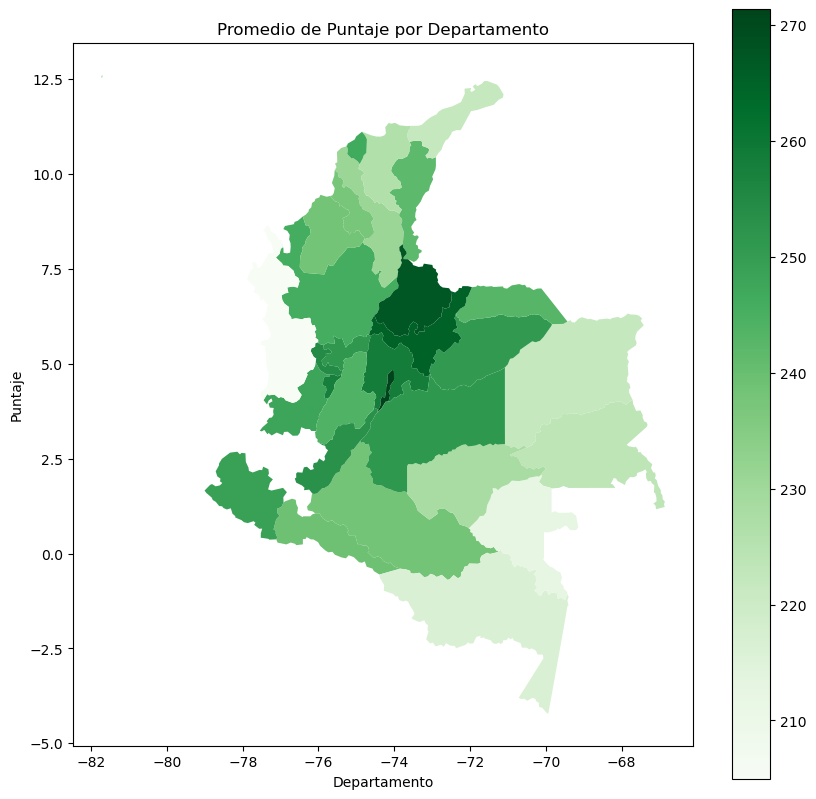

In [22]:
import matplotlib.pyplot as plt
# Crear un mapa coroplético
data.plot(column='punt_global', cmap='Greens', legend=True, figsize=(10, 10))
# INCLUIR TITUOLO Y ETIQUETAS
plt.title('Promedio de Puntaje por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Puntaje')
plt.show()


# Visualización 3

In [23]:
# crear un dataframe con los datos
puntaje = viz['punt_global'].loc[viz['punt_global'] > 359].groupby(viz['estu_depto_reside']).count().sort_values(ascending=False)
puntaje = pd.DataFrame(puntaje)
puntaje = puntaje.reset_index()
puntaje = puntaje.rename(columns={'estu_depto_reside': 'Departamento', 'punt_global': 'Cantidad de estudiantes'})
puntaje = puntaje.sort_values(by=['Cantidad de estudiantes'], ascending=False)
puntaje = puntaje.reset_index()
puntaje = puntaje.drop(['index'], axis=1)
puntaje = puntaje.drop([0], axis=0)
puntaje = puntaje.reset_index()

# Graficar gráfica de barras horizontales
fig = px.bar(
    puntaje,
    y='Departamento',
    x='Cantidad de estudiantes',
    color='Cantidad de estudiantes',
    color_continuous_scale='darkmint',
    orientation='h',
    title='Cantidad de estudiantes que obtienen un puntaje mayor a 359 de acuerdo con el departamento',
    labels={'Cantidad de estudiantes': 'Cantidad de estudiantes'}
)

fig.show()


In [24]:
# Hacer lo mismo pero para estrato
estrato = viz['punt_global'].loc[viz['punt_global'] > 359].groupby(viz['fami_estratovivienda']).count().sort_values(ascending=False)
estrato = pd.DataFrame(estrato)
estrato = estrato.reset_index()
estrato = estrato.rename(columns={'fami_estratovivienda': 'Estrato', 'punt_global': 'Cantidad de estudiantes'})
estrato = estrato.sort_values(by=['Cantidad de estudiantes'], ascending=False)
estrato = estrato.reset_index()
estrato = estrato.drop(['index'], axis=1)
estrato = estrato.drop([0], axis=0)
estrato = estrato.reset_index()

# Graficar gráfica de barras horizontales
fig = px.bar(
    estrato,
    y='Estrato',
    x='Cantidad de estudiantes',
    color='Cantidad de estudiantes',
    color_continuous_scale='darkmint',
    orientation='h',
    title='Cantidad de estudiantes que obtienen un puntaje mayor a 359 de acuerdo con el estrato',
    labels={'Cantidad de estudiantes': 'Cantidad de estudiantes'}
)

fig.show()

## Exploración final

In [2]:
import pandas as pd
# Cargamos los datos del archivo CSV
csv_path = "resultadosicfes.csv"

column_names = [
    "PERIODO", "ESTU_TIPODOCUMENTO", "ESTU_CONSECUTIVO", "COLE_AREA_UBICACION", "COLE_BILINGUE", "COLE_CALENDARIO",
    "COLE_CARACTER", "COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE", "COLE_COD_DEPTO_UBICACION",
    "COLE_COD_MCPIO_UBICACION", "COLE_CODIGO_ICFES", "COLE_DEPTO_UBICACION", "COLE_GENERO", "COLE_JORNADA",
    "COLE_MCPIO_UBICACION", "COLE_NATURALEZA", "COLE_NOMBRE_ESTABLECIMIENTO", "COLE_NOMBRE_SEDE",
    "COLE_SEDE_PRINCIPAL", "ESTU_COD_DEPTO_PRESENTACION", "ESTU_COD_MCPIO_PRESENTACION", "ESTU_COD_RESIDE_DEPTO",
    "ESTU_COD_RESIDE_MCPIO", "ESTU_DEPTO_PRESENTACION", "ESTU_DEPTO_RESIDE", "ESTU_ESTADOINVESTIGACION",
    "ESTU_ESTUDIANTE", "ESTU_FECHANACIMIENTO", "ESTU_GENERO", "ESTU_MCPIO_PRESENTACION", "ESTU_MCPIO_RESIDE",
    "ESTU_NACIONALIDAD", "ESTU_PAIS_RESIDE", "ESTU_PRIVADO_LIBERTAD", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_TIENEAUTOMOVIL", "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET", "FAMI_TIENELAVADORA", "DESEMP_INGLES", "PUNT_INGLES", "PUNT_MATEMATICAS",
    "PUNT_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA", "PUNT_GLOBAL"
]

df = pd.read_csv(csv_path)

In [3]:
#ELIMINAMOS COLUMNAS INNECESARIAS
columnas_eliminar = ['ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION','COLE_BILINGUE','COLE_CALENDARIO','COLE_CARACTER','COLE_COD_DANE_ESTABLECIMIENTO','COLE_COD_DANE_SEDE','COLE_COD_DEPTO_UBICACION','COLE_COD_MCPIO_UBICACION','COLE_CODIGO_ICFES','COLE_GENERO','COLE_JORNADA','COLE_MCPIO_UBICACION','COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL', 'ESTU_COD_DEPTO_PRESENTACION','ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE', 'ESTU_ESTADOINVESTIGACION', 'ESTU_ESTUDIANTE', 'ESTU_FECHANACIMIENTO','ESTU_MCPIO_PRESENTACION','ESTU_MCPIO_RESIDE', 'ESTU_NACIONALIDAD','ESTU_PAIS_RESIDE', 'ESTU_PRIVADO_LIBERTAD', 'DESEMP_INGLES','PUNT_INGLES','PUNT_MATEMATICAS','PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA']

df = df.drop(columnas_eliminar, axis=1)
df =df.dropna()

#PRIEMRA TRANSFORMACION DE DATOS

mapping = {'No': 0, 'Si': 1}

df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].map(mapping)

df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].map(mapping)

df['FAMI_TIENELAVADORA'] = df['FAMI_TIENELAVADORA'].map(mapping)

df['FAMI_TIENEAUTOMOVIL'] = df['FAMI_TIENEAUTOMOVIL'].map(mapping)

#SEGUNDA TRANSOFRMACION DE DATOS
mappping = {'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6, 'Sin estrato': 0}

df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].map(mappping)


#TERCERA TRANSOFRMACION DE DATOS

mapppping = {'No sabe': 0,'No Aplica': 0,'Ninguno': 0, 'Primaria incompleta': 1, 'Primaria completa': 2, 'Secundaria (Bachillerato) incompleta': 3, 'Secundaria (Bachillerato) completa': 4, 'TÃ©cnica o tecnolÃ³gica incompleta': 5, 'TÃ©cnica o tecnolÃ³gica completa': 6, 'EducaciÃ³n profesional incompleta':7,'EducaciÃ³n profesional completa':8,'Postgrado':9}

df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].map(mapppping)
df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].map(mapppping)

#CUARTA TRANSFORMACION DE DATOS

mapeo = {'F': 0, 'M': 1}

df['ESTU_GENERO'] = df['ESTU_GENERO'].map(mapeo)

#QUINTA TRANSFORMACION DE DATOS

mappeo = {'Uno': 1, 'Dos': 2,'Tres':3, 'Cuatro':4,'Cinco':5, 'Seis o mas':6}

df['FAMI_CUARTOSHOGAR'] = df['FAMI_CUARTOSHOGAR'].map(mappeo)

#SEXTA TRANSFORMACION DE DATOS

mapppeo = {'1 a 2': 1, '3 a 4': 2,'5 a 6':3, '7 a 8':4,'9 o mÃ¡s':5}

df['FAMI_PERSONASHOGAR'] = df['FAMI_PERSONASHOGAR'].map(mapppeo)

Nuevos_nombres = ['Periodo', 'Departamento', 'Genero','Cuartos','Madre','Padre','Estrato','Conviven','Carro','Computador','Internet','Lavadora','Puntaje']

df.columns = Nuevos_nombres

df.drop('Departamento', axis=1, inplace=True)

  0%|          | 0/1000000 [00:00<?, ?it/s]

DAG with 12 nodes and 11 edges
['Periodo', 'Genero', 'Cuartos', 'Madre', 'Padre', 'Estrato', 'Conviven', 'Carro', 'Computador', 'Internet', 'Lavadora', 'Puntaje']
[('Cuartos', 'Conviven'), ('Madre', 'Padre'), ('Madre', 'Puntaje'), ('Madre', 'Genero'), ('Padre', 'Estrato'), ('Estrato', 'Internet'), ('Computador', 'Carro'), ('Internet', 'Computador'), ('Internet', 'Lavadora'), ('Internet', 'Periodo'), ('Lavadora', 'Cuartos')]


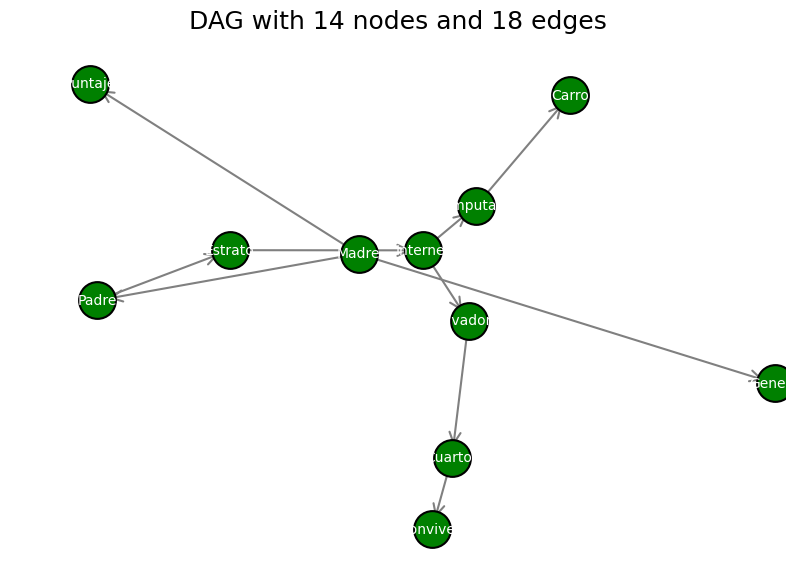

In [5]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State
import plotly.graph_objs as go
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score
import networkx as nx
import matplotlib.pyplot as plt


#SE DIVIDE EL SET EN DATOS DE TEST Y DE PRUEBA

train_og, test_og = train_test_split(df, test_size=0.3)

#SE CREAN AMBOS GRUPOS DE DATOS

train = train_og.dropna()
test = test_og.dropna()

#NOS ASEGURAMOS DE NO TENER COLUMNAS NO DESEADAS EN NUESTRO ESTUDIO


#CONVERTIMOS LA VARIABLE DE INTERES EN BINARIA PARA LOS DATOS DE PRUEBA Y LOS DE TEST


train.loc[train['Puntaje'] < 359, 'Puntaje'] = 0
train.loc[train['Puntaje'] >= 359, 'Puntaje'] = 1


train.loc[train['Puntaje'] < 359, 'Puntaje'] = 0
train.loc[train['Puntaje'] >= 359, 'Puntaje'] = 1

#ESTABLECEMOS LOS METODOS DE PUNTAJE

scoring_method = K2Score(data=df)
esth = HillClimbSearch(data=df)


#CREAMOS EL NUEVO MODELO UTILIZANDO PUNTAJE K2

new_model = esth.estimate(
    scoring_method=scoring_method,
    max_indegree=1,
    max_iter=int(1e6),black_list=(
        tuple(['Puntaje', 'Departamento']),
        tuple(['Puntaje', 'Genero']),
        tuple(['Puntaje', 'Cuartos']),
        tuple(['Puntaje', 'Madre']),
        tuple(['Puntaje', 'Padre']),
        tuple(['Puntaje', 'Estrato']),
        tuple(['Puntaje', 'Conviven']),
        tuple(['Puntaje', 'Carro']),
        tuple(['Puntaje', 'Computador']),
        tuple(['Puntaje', 'Internet']),
        tuple(['Puntaje', 'Lavadora']),
        tuple(['Puntaje', 'Puntaje']),        

    ))

#IMPRIMIMOS MODELO PARA VERIFICAR
print(new_model)
print(new_model.nodes())
print(new_model.edges())



# Definición del DAG
nodes = ['Genero', 'Cuartos', 'Madre', 'Padre', 'Estrato', 'Conviven', 'Carro', 'Computador', 'Internet', 'Lavadora', 'Puntaje']
edges = [('Cuartos', 'Conviven'), ('Madre', 'Padre'), ('Madre', 'Puntaje'), ('Madre', 'Genero'), ('Padre', 'Estrato'), ('Estrato', 'Internet'), ('Computador', 'Carro'), ('Internet', 'Computador'), ('Internet', 'Lavadora'), ('Lavadora', 'Cuartos')]

# Creación del grafo
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Configuración del estilo de visualización
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.5, seed=4)

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='green', edgecolors='black', linewidths=1.5)
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=10, font_color='white')
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color='gray', width=1.5, arrowstyle='->')

# Establecer límites de zoom

plt.xlim(-0.7, 0.7)

# Mostrar la visualización del DAG
plt.title("DAG with 14 nodes and 18 edges", fontsize=18)
plt.axis('off')
plt.show()



In [6]:
# Creamos el modelo bayesiano
model = BayesianNetwork(new_model.edges())

# Estimamos las distribuciones de probabilidad usando MLE
model.fit(train, estimator=MaximumLikelihoodEstimator)

# Estimamos las distribuciones de probabilidad usando MLE y BayesianEstimator
model.fit(train, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

# Hacemos inferencias en el modelo bayesiano
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

In [11]:
# Hacer predicciones sobre los datos de prueba
predictions = []
for i in range(len(test)):
    # evidence sin puntaje
    evidence = test.iloc[i, 1:-1].to_dict()
    prediction = infer.query(variables=['Puntaje'], evidence=evidence)
    predictions.append(prediction)

# Convertir las predicciones a valores binarios
predictions_binary = [1 if len(prediction.values) > 1 and prediction.values[1] > 0.5 else 0 for prediction in predictions]
if len(predictions_binary) == 1:
    predictions_binary = [0] * len(predictions)


# Convertir las etiquetas a una lista
labels = test['Puntaje'].tolist()

# Crear la matriz de confusión
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(labels, predictions_binary)

# tn: true negative, fp: false positive, fn: false negative, tp: true positive

# Calcular los porcentajes de verdaderos y falsos positivos y negativos
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / sum(cm.ravel())
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)

ValueError: too many values to unpack (expected 4)